In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten , Conv2D , MaxPooling2D
from keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
from keras.utils import to_categorical
print('Shape of Training data:', train_images.shape,train_labels.shape)
print('Shape of Testing data:', test_images.shape,test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Shape of Training data: (50000, 32, 32, 3) (50000, 1)
Shape of Testing data: (10000, 32, 32, 3) (10000, 1)


In [4]:
#Find te unique numbers from the train labels
classes = np.unique(train_labels)
no_of_Classes = len(classes)
print('Total number of outputs : ', no_of_Classes)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
"""Find the shape of the input images and create the variable input_shape"""
no_of_rows,no_of_cols,no_of_dims = train_images.shape[1:]
training_Data = train_images.reshape(train_images.shape[0],no_of_rows,no_of_cols,no_of_dims)
testing_Data = test_images.reshape(test_images.shape[0],no_of_rows,no_of_cols,no_of_dims)
input_shape = (no_of_rows,no_of_cols,no_of_dims)

In [6]:
#Change the datatype to float
training_Data = training_Data.astype('float32')
testing_Data = testing_Data.astype('float32')

In [7]:
#Scale the data to lie between 0 to 1
training_Data /= 255
testing_Data /= 255

In [8]:
#Change the labels from integer to categorical data
train_Labels = to_categorical(train_labels)
test_Labels = to_categorical(test_labels)

In [9]:
#Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_Labels[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
def createModel():
  model = Sequential()
  #The first two layers with 32 filters of  window size 3x3
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_Classes, activation='softmax'))
  return model


In [11]:
model_one = createModel()
batch_size = 3
epochs = 3
model_one.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_one.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,138 (1.05 MB)

 Trainable params: 276,138 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model_one.fit(training_Data, train_Labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testing_Data, test_Labels))
model_one.evaluate(testing_Data, test_Labels)
model_one.predict(testing_Data)

Epoch 1/3
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 417s 25ms/step - accuracy: 0.2568 - loss: 2.0022 - val_accuracy: 0.3387 - val_loss: 1.8110
Epoch 2/3
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 403s 23ms/step - accuracy: 0.2457 - loss: 2.1144 - val_accuracy: 0.1000 - val_loss: 2.3136
Epoch 3/3
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 391s 23ms/step - accuracy: 0.1515 - loss: 2.2891 - val_accuracy: 0.2255 - val_loss: 2.0507
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.2217 - loss: 2.0677
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


array([[6.04865775e-02, 3.93356495e-02, 1.32084608e-01, ...,
        1.23486787e-01, 4.74387556e-02, 6.05572239e-02],
       [1.49178997e-01, 2.29148641e-01, 1.31825173e-08, ...,
        2.73204641e-08, 4.45151359e-01, 1.76521018e-01],
       [1.06622405e-01, 1.10978194e-01, 9.41481516e-02, ...,
        8.69818851e-02, 1.09687239e-01, 1.36816859e-01],
       ...,
       [6.04865775e-02, 3.93356495e-02, 1.32084608e-01, ...,
        1.23486787e-01, 4.74387556e-02, 6.05572239e-02],
       [6.04865775e-02, 3.93356495e-02, 1.32084608e-01, ...,
        1.23486787e-01, 4.74387556e-02, 6.05572239e-02],
       [6.04865775e-02, 3.93356495e-02, 1.32084608e-01, ...,
        1.23486787e-01, 4.74387556e-02, 6.05572239e-02]], dtype=float32)

Text(0.5, 1.0, 'Loss Curves')

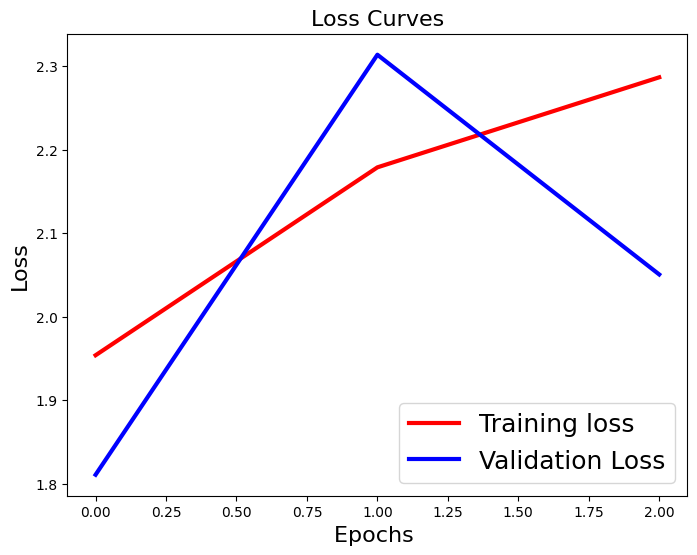

In [13]:
#Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

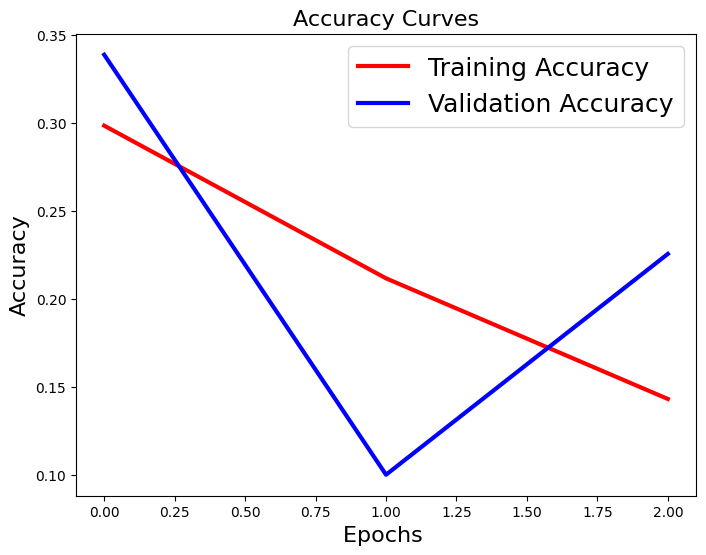

In [15]:
#Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)